In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [4]:
cd /home/jake/Projects/mila/6759/cnn-downscaling/

/home/jake/Projects/mila/6759/cnn-downscaling


In [5]:
temp_coarse = xr.open_zarr("./data/processed/temp/5625/temp_5625_processed.zarr").to_dataframe()
temp_fine = xr.open_zarr("./data/processed/temp/1406/temp_1406_processed.zarr").to_dataframe()

In [6]:
temp_coarse.columns=['temperature']
temp_coarse['temperature'] = temp_coarse['temperature'].astype(float)

temp_fine.columns=['temperature']
temp_fine['temperature'] = temp_fine['temperature'].astype(float)

In [8]:
daily_mean_coarse = temp_coarse.groupby("date").mean()
daily_std_coarse = temp_coarse.groupby("date").std()

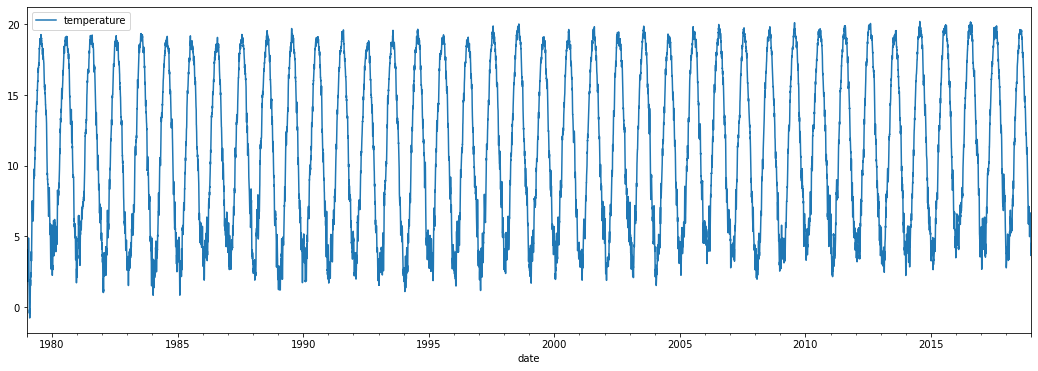

In [18]:
daily_mean_coarse.plot(figsize=(18,6));

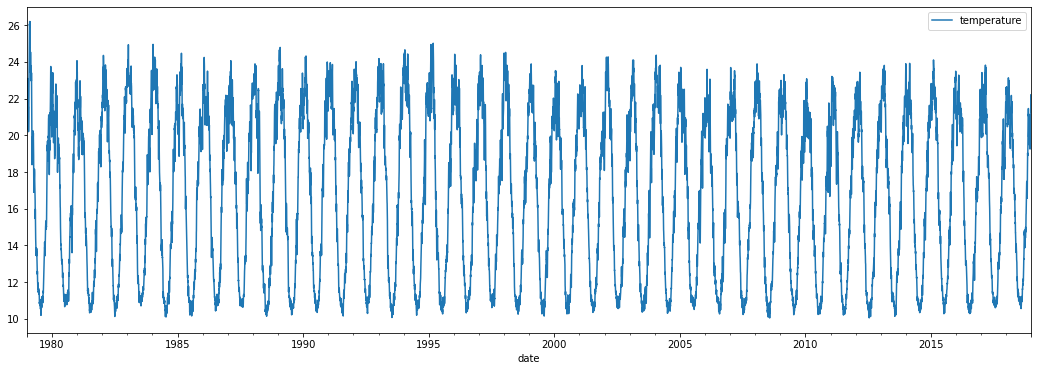

In [19]:
daily_std_coarse.plot(figsize=(18,6));

In [20]:
temp_coarse_standardized = (temp_coarse - daily_mean_coarse) / daily_std_coarse
temp_fine_standardized = (temp_fine - daily_mean_coarse) / daily_std_coarse

In [23]:
random_dates = pd.Series(temp_fine_standardized.index.levels[0]).sample(2)

In [24]:
list(random_dates)

[Timestamp('1988-05-28 00:00:00'), Timestamp('1993-11-13 00:00:00')]

In [26]:
temp_fine_random = temp_fine.loc[random_dates]
temp_fine_standardized_random = temp_fine_standardized.loc[random_dates]

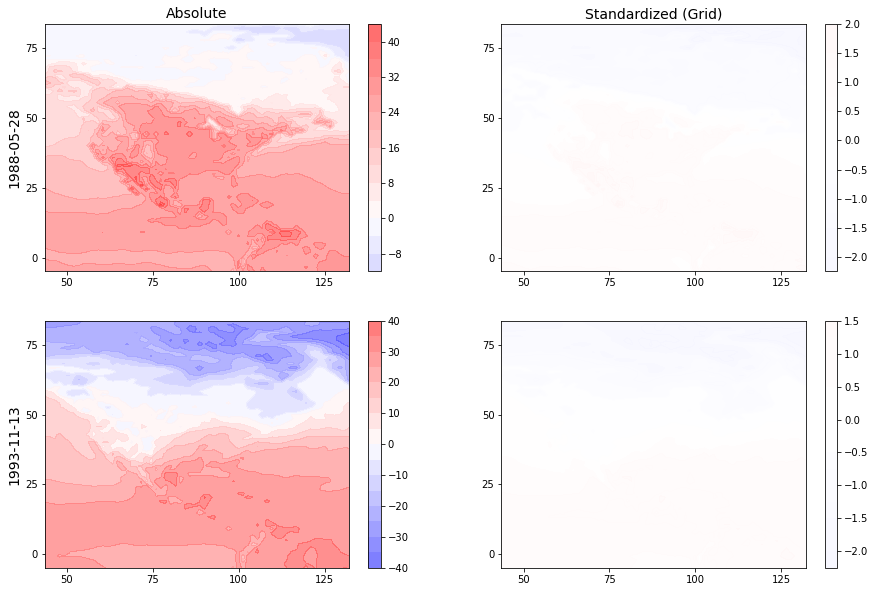

In [33]:
fig, axes = plt.subplots(len(random_dates), 2, figsize=(15, 5*len(random_dates)))

for row, dte in enumerate(random_dates):
    for col, vals in enumerate([temp_fine.loc[dte], temp_fine_standardized.loc[dte]]):
        vals_grid = vals.unstack("lon")

        cs = axes[row,col].contourf(
            vals_grid.columns.get_level_values("lon"),
            vals_grid.index,
            vals_grid.values,
            levels=16, alpha=.67,
            cmap = 'bwr', vmin=-50, vmax=50
        )

        if row == 0:
            title = "Absolute" if col == 0 else "Standardized (Grid)"
            axes[row,col].set_title(title, fontsize=14)

        if col == 0:
            axes[row,col].set_ylabel(str(dte.date()), fontsize=14)
            
        axes[row,col].locator_params(nbins=4)
        fig.colorbar(cs, ax=axes[row,col]);